In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [4]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [6]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)

In [7]:
X_train[0].min(), X_train[0].max()

(0.0, 0.00392156862745098)

In [12]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


In [10]:
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

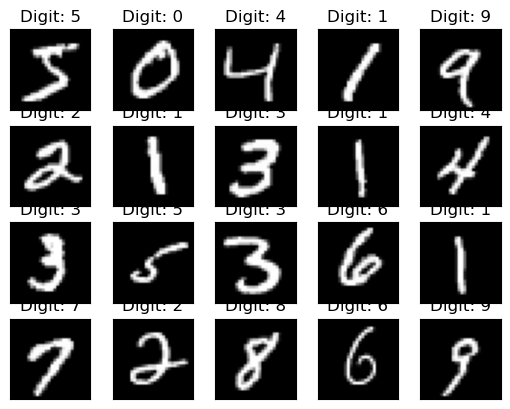

In [13]:
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
plt.show()

In [14]:
X_train = X_train.reshape((X_train.shape + (1,)))

In [15]:
X_test = X_test.reshape((X_test.shape + (1,)))

In [16]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [19]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)

In [20]:
model.compile(
optimizer=optimizer,
loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [22]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3020 - accuracy: 0.1108
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3018 - accuracy: 0.1114
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3019 - accuracy: 0.1110
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3020 - accuracy: 0.1112
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3020 - accuracy: 0.1103
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3019 - accuracy: 0.1106
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3020 - accuracy: 0.1105
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3019 - accuracy: 0.1111
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3019 - accuracy: 0.1108
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2

In [23]:
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

1/1 [==============================] - 0s 16ms/step


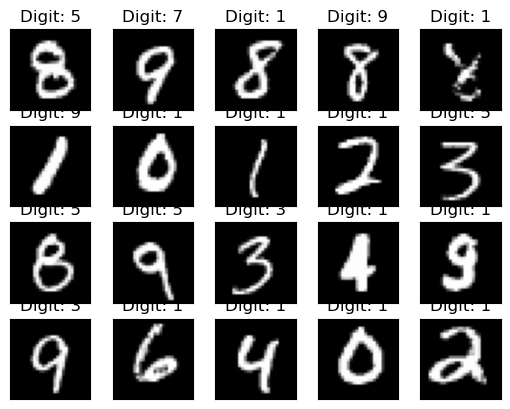

In [24]:
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

In [25]:
predictions = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 0s 2ms/step


In [26]:
accuracy_score(y_test, predictions)

0.1557

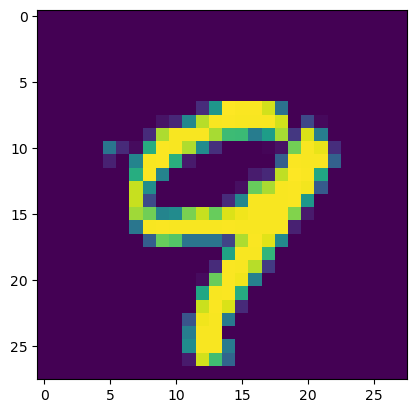

In [30]:
n=random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()

In [31]:
predicted_value=model.predict(X_test)

313/313 [==============================] - 0s 2ms/step


In [33]:
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

Handwritten number in the image is= 1


In [34]:
score = model.evaluate(X_test, y_test, verbose=0)

In [35]:
print('Test loss', score[0])

Test loss 2.3008310794830322


In [36]:
print('Test accuracy', score[1])

Test accuracy 0.15569999814033508
